# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis we will explore the factors that affect the amount of revenue generated by the release of movies. 

Specifically, we will explore the following questions:
1. Which directors have directed the most movies?
2. How much total revenue do the directors who direct the most movies generate(based on revenue in terms of 2010 dollars)?
3. Does the number of movies that a director has directed have an effect on the poplarity of a movie?
4. Does the number of movies that a director has directed have an effect on the average viewer rating?
5. Which genres have the most movies?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
In this section we will read the data from the TMDb movies database that will be used for the data. We will also view the shape and properties of the data to assist in determining which data is needed for analysis and which data can be dropped from the dataset.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Display shape of dataframe
df.shape

(10866, 21)

In [4]:
# Display a list of the columns and the number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Find the total number of null values for each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# View rows with null values
df[df.isnull().any(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
38,241554,tt2199571,3.237370,50000000,71561644,Run All Night,Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...,NaN,Jaume Collet-Serra,No sin goes unpunished,...,Brooklyn mobster and prolific hit man Jimmy Co...,114,Action|Crime|Drama|Mystery|Thriller,Vertigo Entertainment|Energy Entertainment|Rat...,3/11/15,814,6.3,2015,4.599998e+07,6.583668e+07
42,321697,tt2080374,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,http://www.stevejobsthefilm.com,Danny Boyle,NaN,...,Set backstage at three iconic product launches...,122,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,10/9/15,1035,6.9,2015,2.759999e+07,3.168651e+07
43,203801,tt1638355,3.053421,75000000,108145109,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,NaN,Guy Ritchie,Saving the world never goes out of style.,...,"At the height of the Cold War, a mysterious cr...",116,Comedy|Action|Adventure,Davis Entertainment|Warner Bros.|Wigram Produc...,8/13/15,1548,7.0,2015,6.899997e+07,9.949346e+07
47,286565,tt3622592,2.968254,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,NaN,Jake Schreier,Get Lost. Get Found.,...,Quentin Jacobsen has spent a lifetime loving t...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.2,2015,1.104000e+07,7.867128e+07


### Data Cleaning

The dataset will be cleaned by removing columns that are not needed to answer the questions of this analysis and by removing null and duplicate values from the remaining dataset.

In [7]:
# Drop rows not needed for analysis
df.drop(['id', 'budget', 'revenue', 'overview', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'production_companies',], axis=1, inplace=True)

In [8]:
# View the layout of the dataframe
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# View rows with null values
df[df.isnull().any(axis=1)]

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.000000e+00,0.000000e+00
532,0.126594,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,0.108072,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,0.100910,With This Ring,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
620,0.129696,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
997,0.330431,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.000000e+00
1032,0.291253,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,0.269468,Unlocking Sherlock,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,0.119891,Free to Play,NaN,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,0.135376,Dance-Off,NaN,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00


In [10]:
# Dropping all rows with null values due to rows having low popularity and negligible budgets as well as revenue. 
df.dropna(axis=0, inplace=True)

In [11]:
# Verify that there are the same number of non-null entries for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10801 non-null float64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1012.6+ KB


In [12]:
# View the number of duplicated values
df.duplicated().sum()

1

In [13]:
# Drop any duplicated rows
df.drop_duplicates(inplace=True)

In [14]:
# Verify that that there are no duplicate rows
df.duplicated().sum()

0

In [15]:
# Remove rows with zeroes in any of the following columns: runtime, budget_adj, and revenue_adj
df = df[df.runtime != 0]
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [16]:
# Verify that all columns have the same number of entries with no duplicates or null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
release_date      3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 361.2+ KB


In [17]:
# Convert budget_adj columns to integers from floats and verify conversion.
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis

### Which directors have directed the most movies?

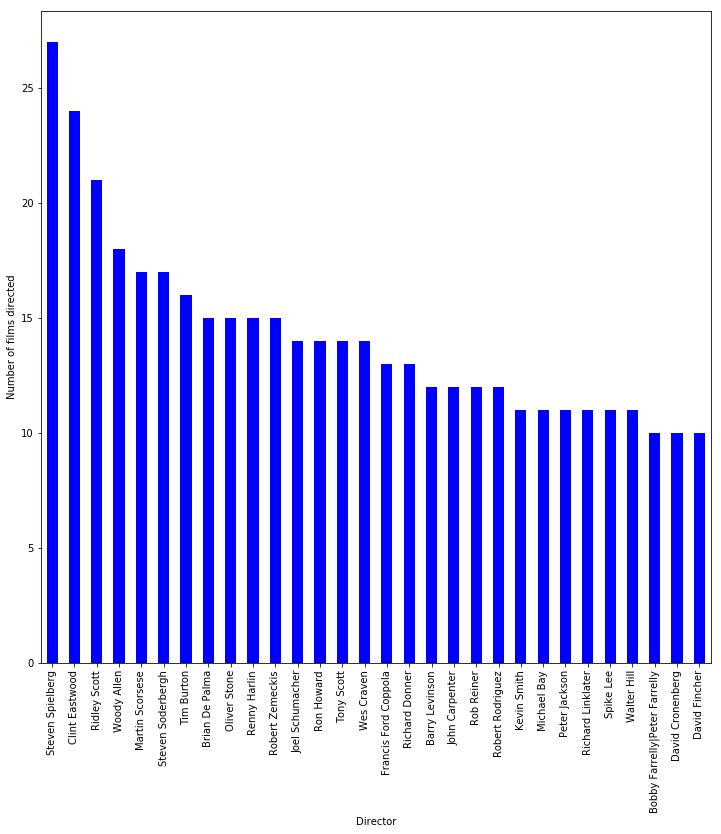

In [18]:
# Generate a bar plot of directors based on number of directed films
top_30_directors = df.groupby('director').size().nlargest(30).reset_index(name='total')
top_30_directors.plot(x='director', y='total', kind='bar', figsize=(12,12), color='blue', legend=None).set(xlabel='Director', ylabel='Number of films directed');

### How much total revenue do the directors who direct the most movies generate?

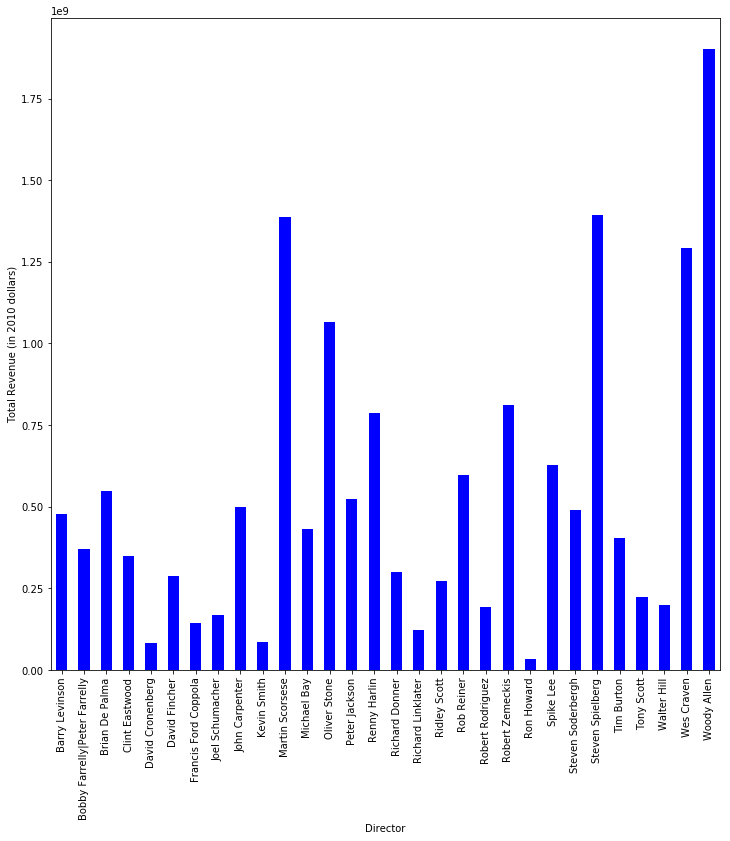

In [19]:
# Generate a bar plot of total revenue for the 30 most popular directors.
top_30_revenue = df.groupby(top_30_directors['director'])['revenue_adj'].sum().reset_index(name='total')
top_30_revenue.plot(x='director', y='total', kind='bar', figsize=(12,12), legend=None, color='blue').set(xlabel='Director', ylabel='Total Revenue (in 2010 dollars)');

### Does the number of movies that a director has directed have an effect on the poplarity of a movie?

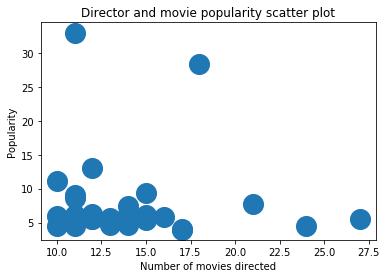

In [20]:
# Generate a scatter plot of number of films directed vs popularity of the film
popularity = df.groupby(top_30_directors['director'])['popularity'].mean().reset_index(name='popular_avg')
plt.scatter(top_30_directors['total'], popularity['popular_avg'], s=400);
plt.title("Director and movie popularity scatter plot")
plt.xlabel("Number of movies directed")
plt.ylabel("Popularity");

### Does the number of movies that a director has directed have an effect on the average viewer rating?

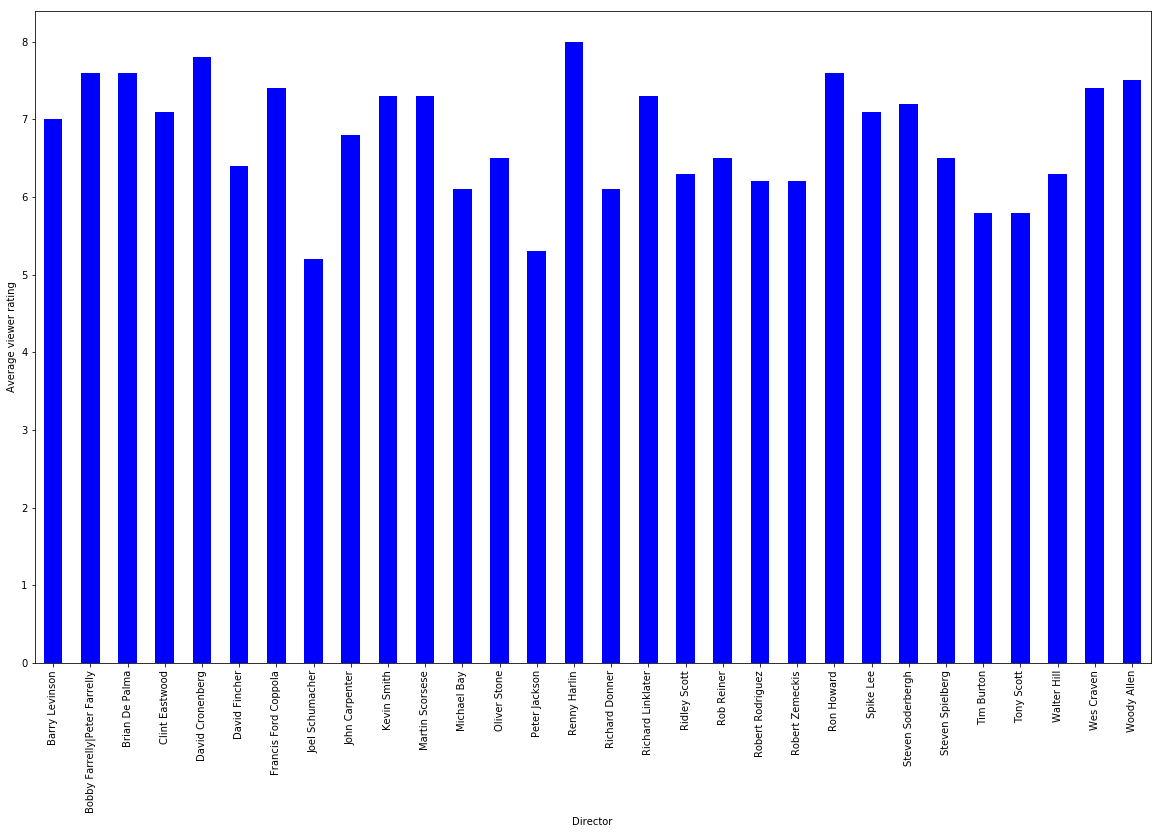

In [21]:
# # Generate a bar plot of director vote average
votes = df.groupby(top_30_directors['director'])['vote_average'].mean().reset_index(name='vote_avg')
votes.plot(x='director', y='vote_avg', kind='bar', figsize=(20,12), color='blue', legend=None).set(xlabel='Director', ylabel='Average viewer rating');

### Which genres have the most films?

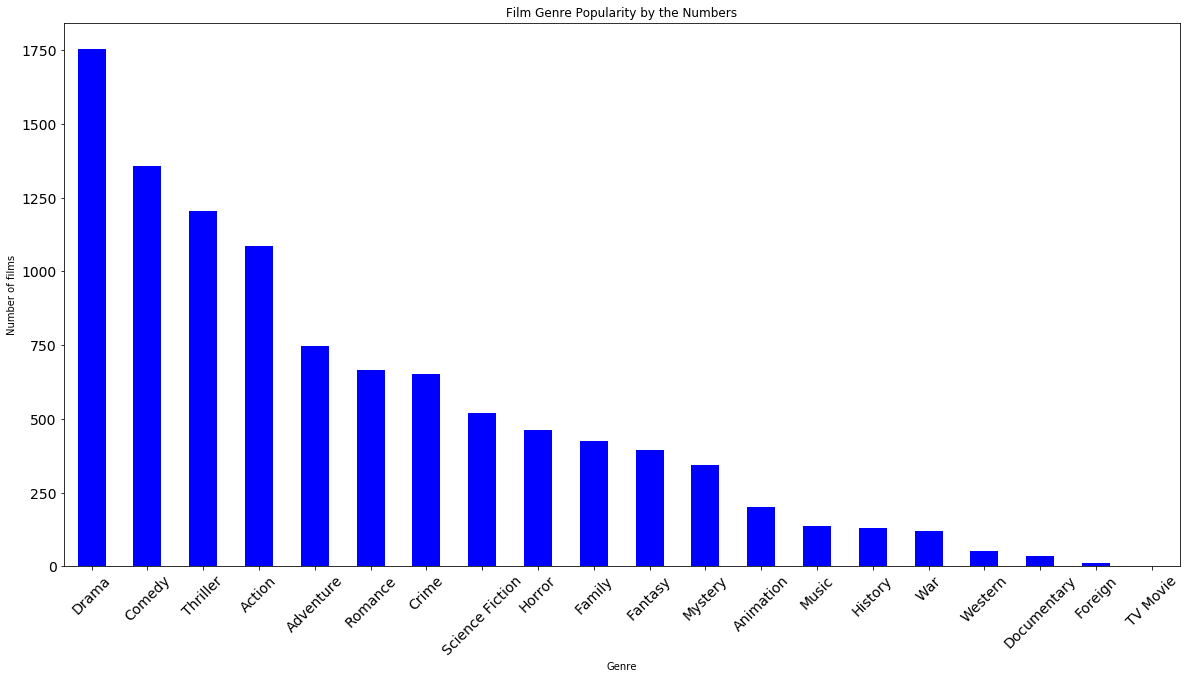

In [22]:
# Concatenate the strings in the genre column, make them into a series,
# then count and plot the distinct values
film_genres = df.genres.str.cat(sep='|')
film_genres = pd.Series(film_genres.split('|'))
film_genre_counts = film_genres.value_counts()
film_genre_counts.plot(figsize=(20,10), kind='bar', color='blue').set(xlabel='Genre', ylabel='Number of films');
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Film Genre Popularity by the Numbers');

<a id='conclusions'></a>
## Conclusions

* Steven Spielberg has directed the most films.
* Woody Allen has generated the most total revenue.
* Remy Harlin has the highest average user rating.
* The number of movies directed does not have a direct corelation to the popularity average.
* There are more films in the drama genre than any other genre.

### Limitations
* This analysis does not include films that don't have an associated runtime which can skew the director, revenue_adj and budget_adj values.
* Films that have 0 revenue and/or budget are not included in the analysis and can skew the total number of films that a director has directed.
* Analysis is based on a small sample of film data and actual totals will skew higher if all data is included.